In [1]:
import smopy
import folium
import requests
import mplleaflet
import numpy as np
import seaborn as sns
from scipy import stats
import geopandas as gpd
from pandas import compat
from folium import plugins
from pandas import read_csv
import matplotlib.pyplot as plt 
import folium.plugins as plugins
from folium.plugins import MarkerCluster
#lib for reading csvs
import pandas as pd
import json
#lib for converting dates
from datetime import datetime

%matplotlib inline 

## User 1

In [10]:
#read csv
da = pd.read_csv('./INPUT_FOLDER/user208.csv', sep=';')
#convert data to list of dictionaries
data = json.loads(da.to_json(orient='records'))

m = folium.Map(
    location=[39.951850, 116.455150],
    zoom_start=12
)

#function for converting dates
def convert_date(date,time):
    return datetime.strptime(date, '%d/%m/%y').strftime('%Y-%m-%d') + 'T' + time

#iterate over pairs
lines = []
for start, end in zip(data[:-1], data[1:]):
    record = dict()
    record['coordinates'] = [
        [start['Longitude'], start['Latitude']],
        [end['Longitude'], end['Latitude']]
    ]
    record['dates'] = [
        convert_date(start['Date'], start['Time']),
        convert_date(end['Date'], end['Time'])
    ] 
    lines.append(record)
    
    
features = [
    {
        'type': 'Feature',
        'geometry': {
            'type': 'LineString',
            'coordinates': line['coordinates'],
        },
        'properties': {
            'times': line['dates'],
            'style': {
                'color' : 'red',
                'weight': line['weight'] if 'weight' in line else 3
            }
        }
    }
    for line in lines
]

plugins.TimestampedGeoJson({
    'type': 'FeatureCollection',
    'features': features,
}, 
    period='PT1M', 
    loop=True, 
    add_last_point=False 
).add_to(m)

m.save('./Map_trajectory/animated_user1.html')

m

## Joint Probability

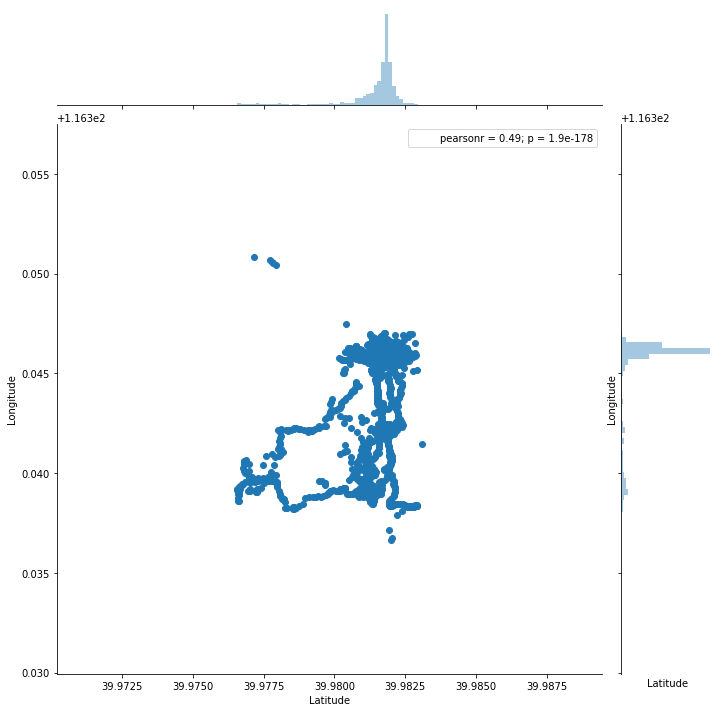

In [11]:
plt.figure(figsize=(15,18))
x = da.Latitude
y = da.Longitude
z = sns.jointplot(x,y,size=10) #Draw a bivariate plot of x and y
plt.ylabel('Longitude')
plt.xlabel('Latitude')
z.savefig('./Map_points/joint_pl1.png')
plt.show()

## Kernel density estimation

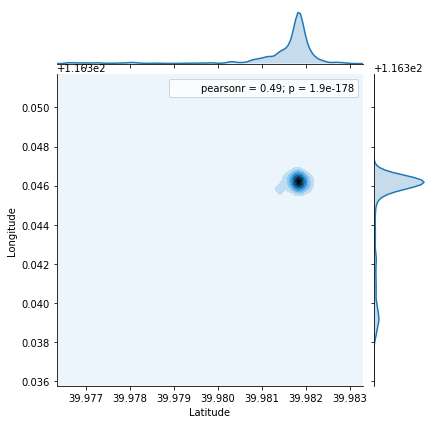

In [12]:
a = sns.jointplot(x, y, data=da, kind="kde");  #kde - Kernel Density Estimation
a.savefig('./Map_points/joint1.png')

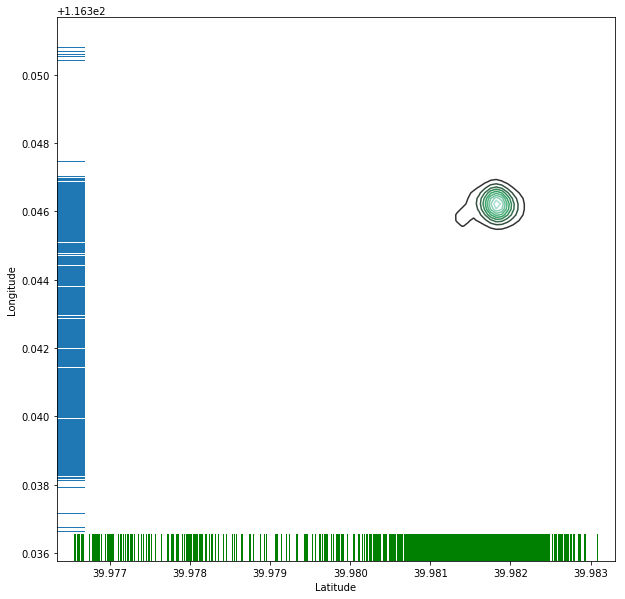

In [13]:
f, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(da.Latitude, da.Longitude, ax=ax)
sns.rugplot(da.Latitude, color="g", ax=ax)
sns.rugplot(da.Longitude, vertical=True, ax=ax);
f.savefig('./Map_points/rug1.png')

# Joint kernel density estimate

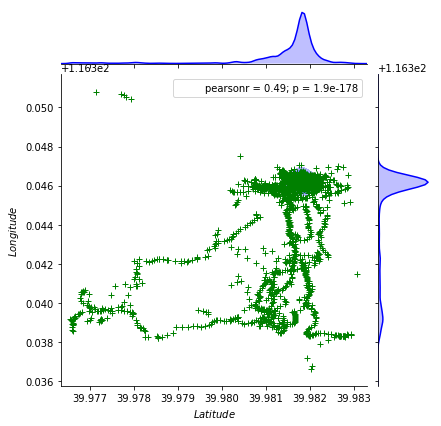

In [14]:
g = sns.jointplot(x, y, data=da, kind="kde", color="b")  # kde is Kernel density estimation
g.plot_joint(plt.scatter, c="g", s=44, linewidth=1, marker="+") # Show the joint distribution using kernel density estimation
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Latitude$", "$Longitude$");
g.savefig('./Map_points/joint_plot1.png')

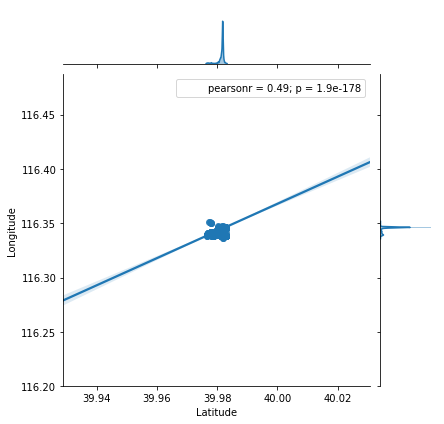

In [15]:
g = sns.JointGrid(x, y, data=da) 
g.plot_joint(sns.regplot, order=1) 
g.plot_marginals(sns.distplot)
g.annotate(stats.pearsonr)
g.savefig('./Map_points/joint_grid1.png')

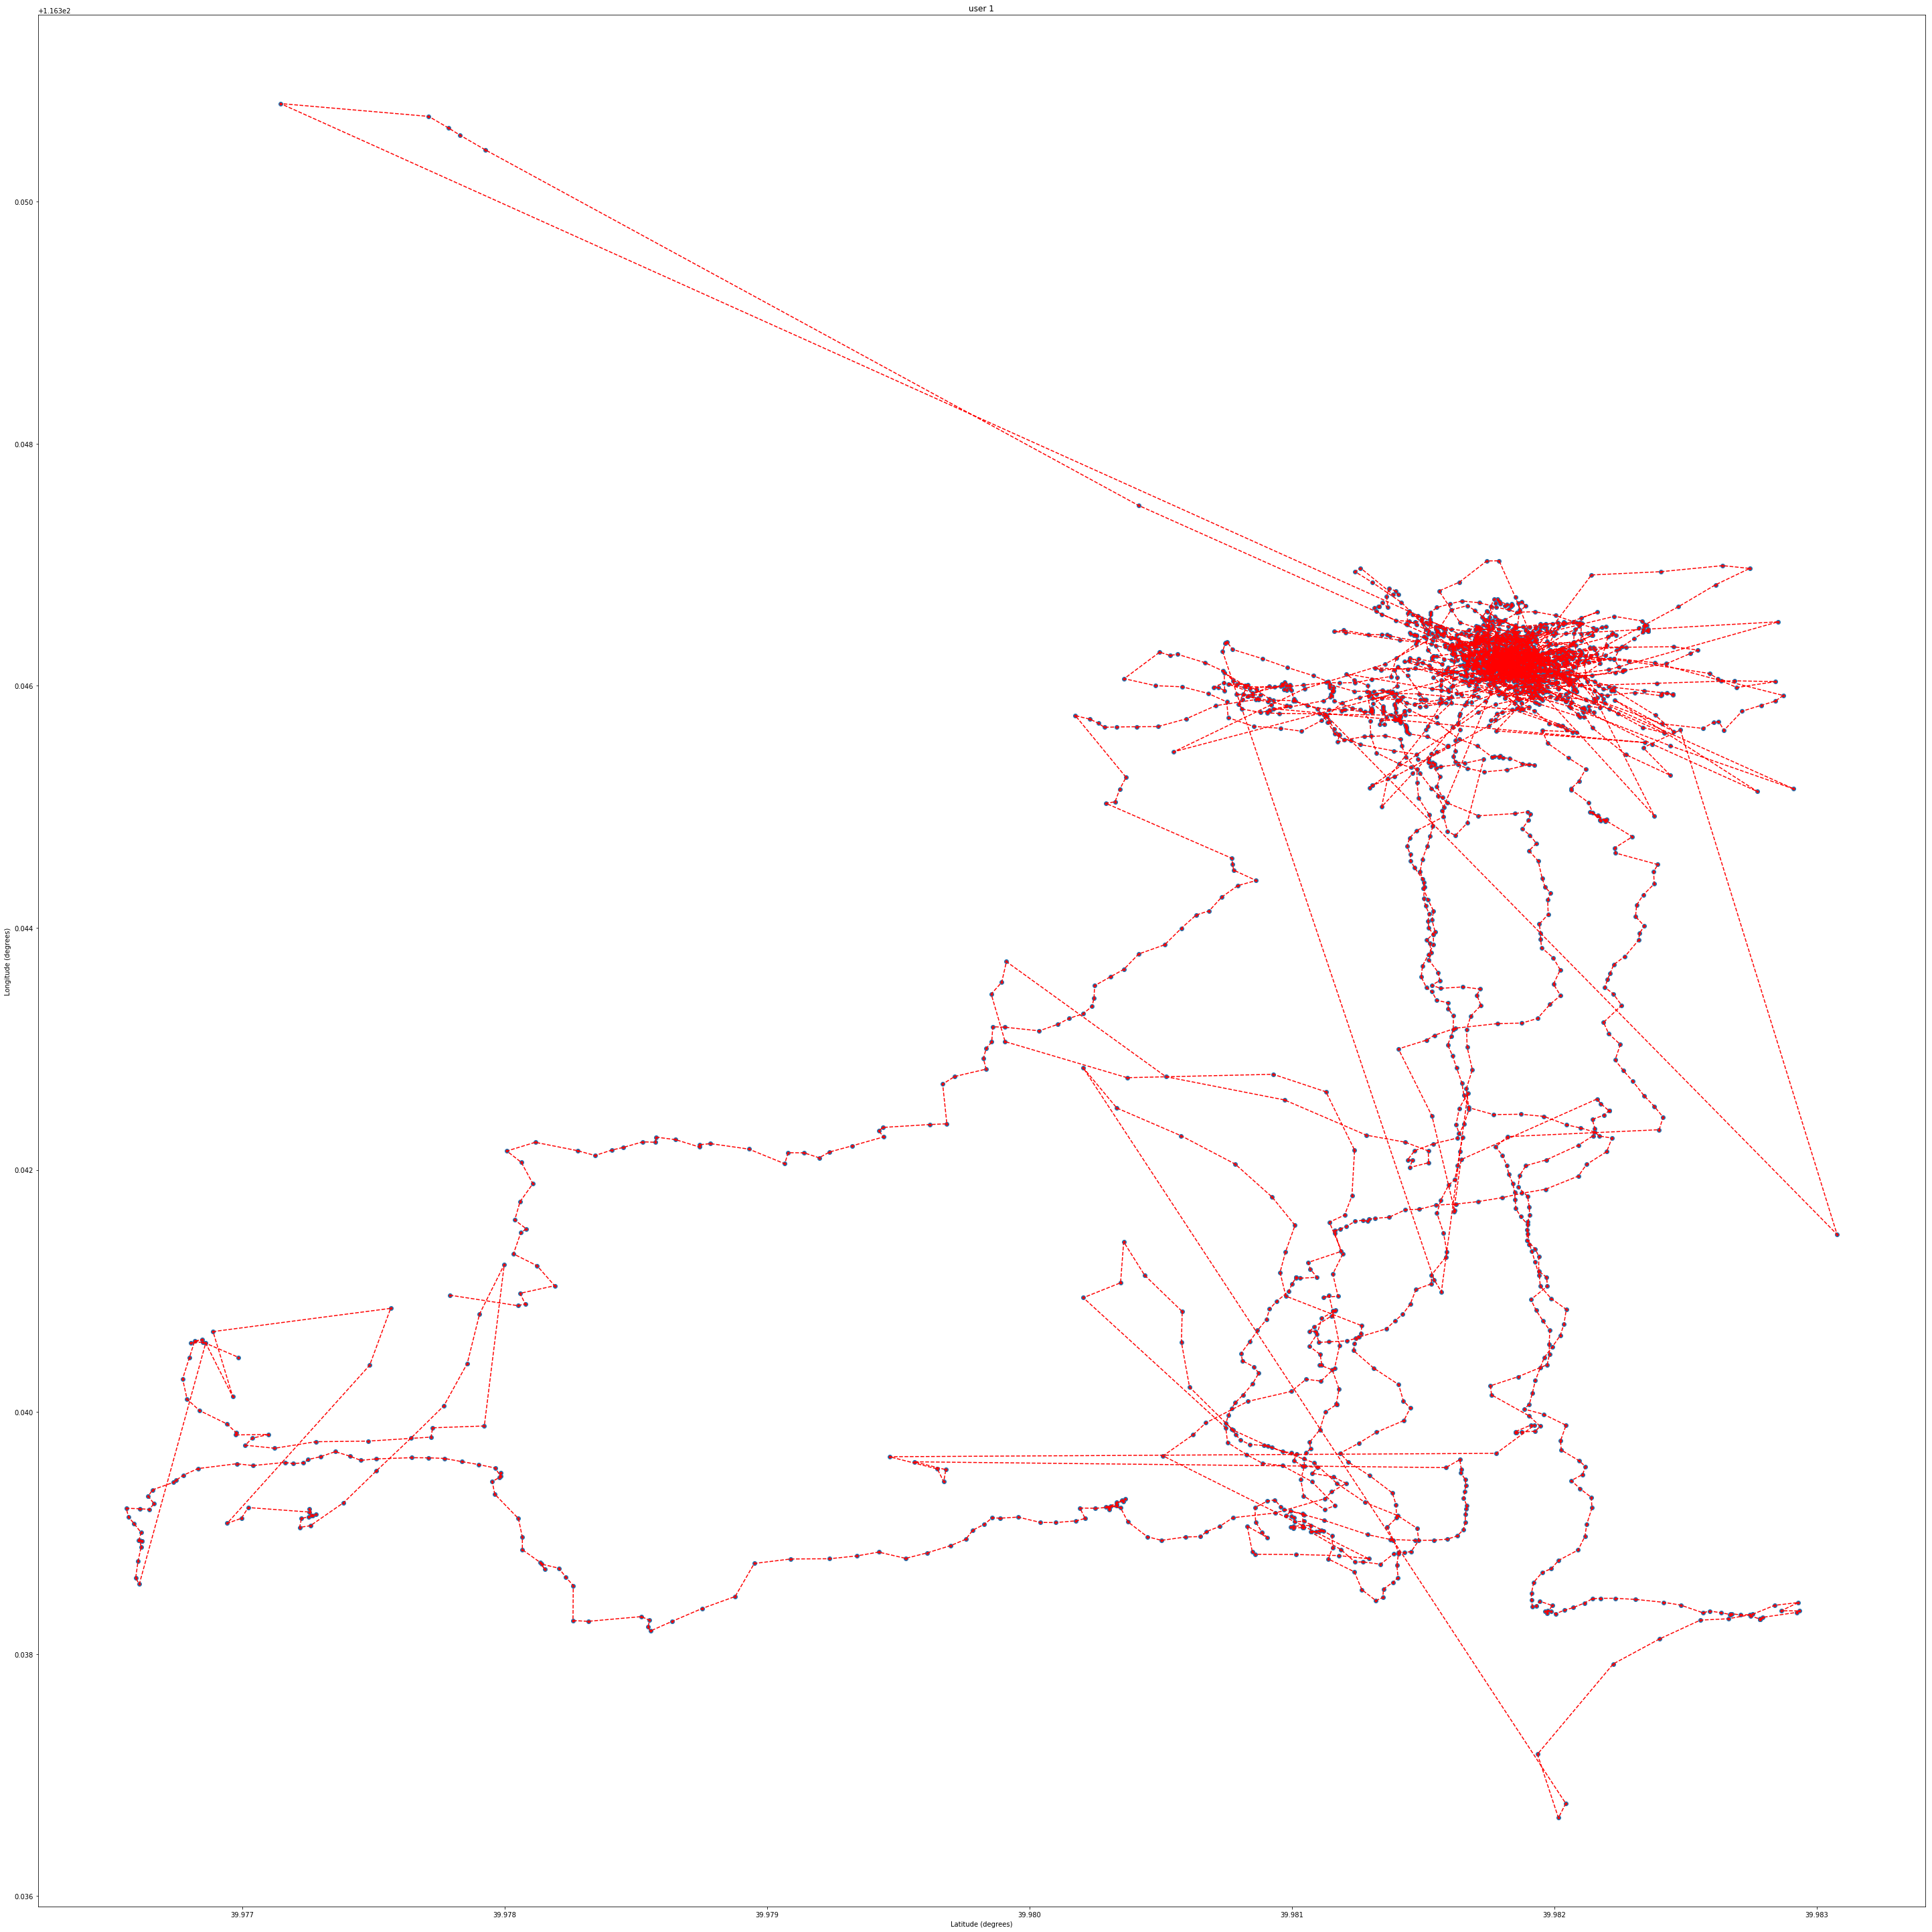

In [16]:
plt.figure(figsize = (40,40))
title = 'map_user10'
plt.title("user 1")
plt.plot(da.Latitude, da.Longitude, '.r--')
plt.scatter(da.Latitude, da.Longitude)
plt.tight_layout()
plt.savefig(title+'.png', bbox_inches='tight')
plt.ylabel('Longitude (degrees)')
plt.xlabel('Latitude (degrees)')
plt.show()

## User 2

In [21]:
#read csv
dg = pd.read_csv('./INPUT_FOLDER/use.csv', sep=';')
#convert data to list of dictionaries
data = json.loads(dg.to_json(orient='records'))

m = folium.Map(
    location=[39.951850, 116.455150],
    zoom_start=12
)

#function for converting dates
def convert_date(date,time):
    return datetime.strptime(date, '%d/%m/%y').strftime('%Y-%m-%d') + 'T' + time

#iterate over pairs
lines = []
for start, end in zip(data[:-1], data[1:]):
    record = dict()
    record['coordinates'] = [
        [start['Longitude'], start['Latitude']],
        [end['Longitude'], end['Latitude']]
    ]
    record['dates'] = [
        convert_date(start['Date'], start['Time']),
        convert_date(end['Date'], end['Time'])
    ] 
    lines.append(record)
    
    
features = [
    {
        'type': 'Feature',
        'geometry': {
            'type': 'LineString',
            'coordinates': line['coordinates'],
        },
        'properties': {
            'times': line['dates'],
            'style': {
                #'color': line['color'],
                'color' : 'green',
                'weight': line['weight'] if 'weight' in line else 3
            }
        }
    }
    for line in lines
]

plugins.TimestampedGeoJson({
    'type': 'FeatureCollection',
    'features': features,
}, period='PT1M', loop=True, add_last_point=False).add_to(m)

m.save('./Map_trajectory/animated_user2.html')

m

## Joint Probability

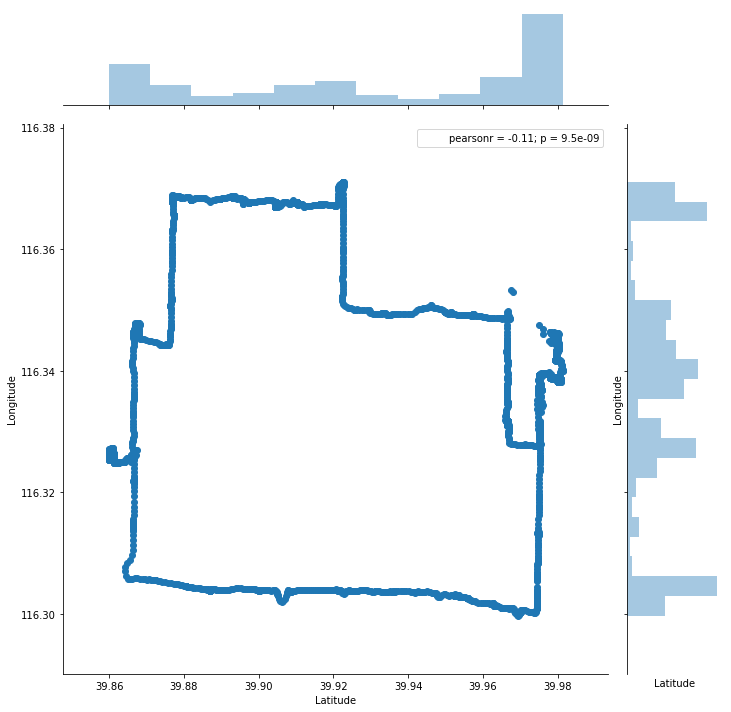

In [22]:
plt.figure(figsize=(15,18))
x = dg.Latitude
y = dg.Longitude
z = sns.jointplot(x,y,size=10) #Draw a bivariate plot of x and y
plt.ylabel('Longitude')
plt.xlabel('Latitude')
z.savefig('./Map_points/joint_p21.png')
plt.show()

## Kernel density estimation

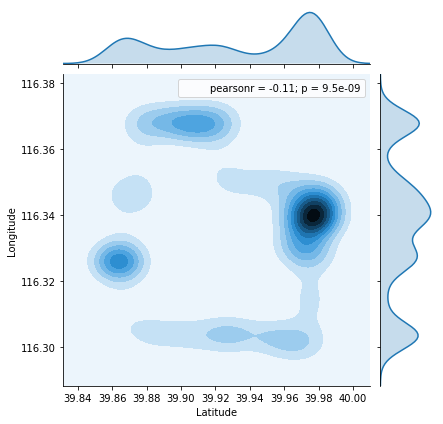

In [ ]:
a = sns.jointplot(x, y, data=dg, kind="kde");  #kde - Kernel Density Estimation
a.savefig('./Map_points/joint2.png')

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(dg.Latitude, dg.Longitude, ax=ax)
sns.rugplot(dg.Latitude, color="g", ax=ax)
sns.rugplot(dg.Longitude, vertical=True, ax=ax);
f.savefig('./Map_points/rug2.png')

# Joint kernel density estimate

In [ ]:
g = sns.jointplot(x, y, data=dg, kind="kde", color="b")  # kde is Kernel density estimation
g.plot_joint(plt.scatter, c="r", s=44, linewidth=1, marker="+") # Show the joint distribution using kernel density estimation
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Latitude$", "$Longitude$");
g.savefig('./Map_points/joint_plot2.png')

In [ ]:
g = sns.JointGrid(x, y, data=dg) 
g.plot_joint(sns.regplot, order=1) 
g.plot_marginals(sns.distplot)
g.annotate(stats.pearsonr)
g.savefig('./Map_points/joint_grid2.png')

In [ ]:
plt.figure(figsize = (40,40))
title = 'map_user10'
plt.title("user 2")
plt.plot(dg.Latitude, dg.Longitude, '.r--')
plt.scatter(dg.Latitude, dg.Longitude)
plt.tight_layout()
plt.savefig(title+'.png', bbox_inches='tight')
plt.ylabel('Longitude (degrees)')
plt.xlabel('Latitude (degrees)')
plt.show()

In [ ]:
#read csv
db = pd.read_csv('./INPUT_FOLDER/', sep=';')